Beatrice Allamand

April 17, 2025

## Econ 248 Problem Set 2


Let the consumer have CES utility over $i = 1, \dots, 100$ goods:

$$U = \left( \sum_{i=1}^{100} a_i^{\frac{1}{\sigma}} c_i^{\frac{\sigma - 1}{\sigma}} \right)^{\frac{\sigma}{\sigma - 1}}$$

The elasticity of substitution $\sigma$ is equal to $4$, and the taste shifters $a_i$ are drawn from a uniform distribution on $(0, 1)$. The utility is equal to $U=1$.


# Part a.
Prices are drawn from a Pareto distribution $G(p) = 1 - (1/p)^8$. Draw a set of prices and compute the expenditure shares. Compute price index.

Comment: I had a problem using the expenditure shares defined in the slides as 
$$s_i \equiv \frac{p_i c_i}{P(\mathbf{p}) X(\mathbf{c})}$$
No matter what I did, I got expenditure shares larger than 1. I include that derivation below (in case it is relevant), but here I will work with this expenditure shares:
$$s_i \equiv \frac{p_i c_i}{\sum p_i c_i}$$

Hicksian demand (Problem 1, Part a.):
$$c_i=\frac{a_i p_i^{-\sigma}}{\Big(\sum_{i=1}^{100} a_i p_i^{1-\sigma}\Big)^\frac{\sigma}{1-\sigma}}U$$

Price index:
$$P(\mathbf{p})=\Big(\sum_{i=1}^{100} a_i p_i^{1-\sigma}\Big)^\frac{1}{1-\sigma}$$




Consumer CES Price Index (P): 0.3035155870492272
Sum of expenditure shares: 1.0


,Price,Taste Shifter (a_i),Expenditure Share,CES Price Index (P)
0,1.050678,0.417022,0.010053,0.303516
1,1.098118,0.720324,0.015210,0.303516
2,1.311775,0.000114,0.000001,0.303516
3,1.056809,0.302333,0.007162,0.303516
4,1.348476,0.146756,0.001673,0.303516


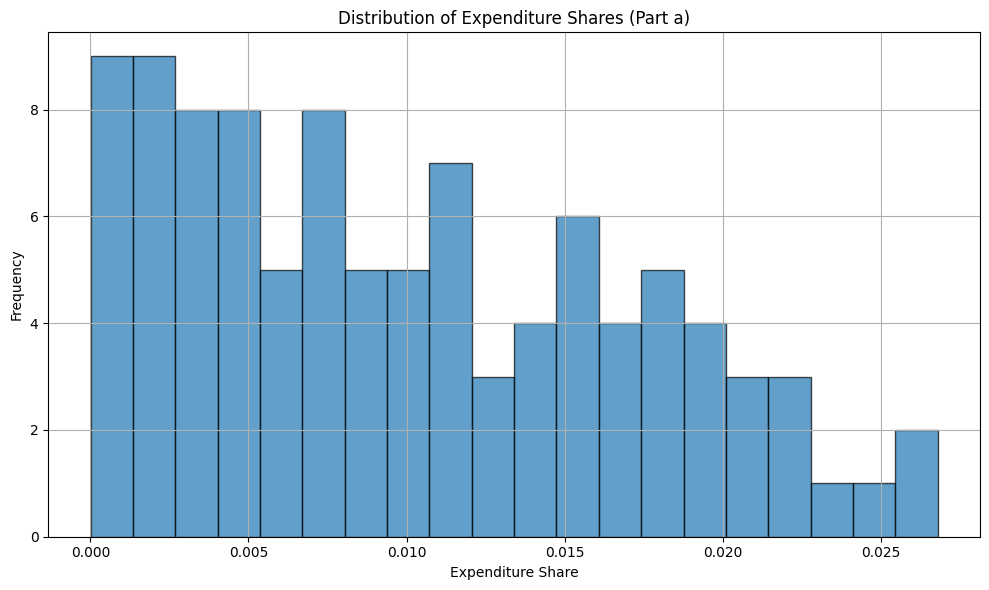

In [32]:
# Problem 3a 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set parameters
sigma = 4
U = 1
num_goods = 100
shape_param = 8  # Pareto shape parameter α

# Step 1: Taste shifters from U(0,1), normalize for stability
np.random.seed(1)
taste_shifters = np.random.uniform(0, 1, num_goods)

# Step 2: Draw prices from Pareto(α=8, x_m=1)
def pareto_sample(size, xm=1.0, alpha=8):
    u = np.random.uniform(0, 1, size)
    return xm / (1 - u) ** (1 / alpha)

prices_a = pareto_sample(num_goods, xm=1, alpha=shape_param)


# Step 3: Compute consumption, CES price index, expenditure shares
numerator =  (taste_shifters * (prices_a ** ( - sigma)))
denominator_sub = np.sum(taste_shifters * (prices_a ** ( 1 - sigma)))
denominator = denominator_sub  ** (sigma / (1 - sigma))
c = numerator / denominator

# Compute CES price index
numerator_price =  np.sum(taste_shifters * (prices_a ** (1 - sigma)))
price_index = numerator_price ** (1 / (1 - sigma))

expenditure_shares = (c * prices_a) / np.sum(c * prices_a)

# Step 5: Display table
df = pd.DataFrame({
    "Price": prices_a,
    "Taste Shifter (a_i)": taste_shifters,
    "Expenditure Share": expenditure_shares,
})
df["CES Price Index (P)"] = price_index

print("Consumer CES Price Index (P):", price_index)
print("Sum of expenditure shares:", np.sum(expenditure_shares))
display(df.head())

# Step 6: Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(expenditure_shares, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribution of Expenditure Shares (Part a)")
plt.xlabel("Expenditure Share")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


# Part a. with the class definition for $s_i$

I followed two strategies, one was to do the same as before (same numerator, denominator from class) and the second, skipping the consumption calculation and using the class formula directly. Both approaches gave me the same numerical graph, the one I present here. I know there is a problem somewhere but I did not found it. Because of that, in part b. I'll use the formula in the other part a., not knowing if it is the theoretically relevant. 


Hicksian demand (Problem 1, Part a.):
$$c_i=\frac{a_i p_i^{-\sigma}}{\Big(\sum_{i=1}^{100} a_i p_i^{1-\sigma}\Big)^\frac{\sigma}{1-\sigma}}U$$

Price index:
$$P(\mathbf{p})=\Big(\sum_{i=1}^{100} a_i p_i^{1-\sigma}\Big)^\frac{1}{1-\sigma}$$

Expenditure share:
$$s_i \equiv \frac{p_i c_i}{P(\mathbf{p}) X(\mathbf{c})}= \frac{p_i c_i}{P(\mathbf{p}) U}$$


Substituting $c_i$:

$$
s_i = \frac{p_i \cdot \left( \frac{a_i p_i^{-\sigma}}{ \left( \sum_j a_j p_j^{1 - \sigma} \right)^{\frac{\sigma}{1 - \sigma}} } U \right)}{P(\mathbf{p}) \cdot U}
$$

Canceling \( U \), and simplifying:

$$
s_i = \frac{a_i p_i^{1 - \sigma}}{P(\mathbf{p}) \cdot \left( \sum_j a_j p_j^{1 - \sigma} \right)^{\frac{\sigma}{1 - \sigma}}}
$$

Now use the identity:

$$
P(\mathbf{p}) = \left( \sum_j a_j p_j^{1 - \sigma} \right)^{\frac{1}{1 - \sigma}} \quad \Rightarrow \quad 
P(\mathbf{p}) \cdot \left( \sum_j a_j p_j^{1 - \sigma} \right)^{\frac{\sigma}{1 - \sigma}} = 
\left( \sum_j a_j p_j^{1 - \sigma} \right)^{\frac{1 + \sigma}{1 - \sigma}}
$$

In other words
$$
P(\mathbf{p}) \cdot \left( \sum_j a_j p_j^{1 - \sigma} \right)^{\frac{\sigma}{1 - \sigma}} = P(\mathbf{p}) \cdot P(\mathbf{p})^\sigma = P(\mathbf{p})^{1 + \sigma}
$$

Substituting back:

$$
\boxed{
s_i = \frac{a_i p_i^{1 - \sigma}}{P(\mathbf{p})^{1 + \sigma}}
}
$$

(Maybe there is something wrong here, or in the code, but as mentioned, consumption shares are larger than 1)


Consumer CES Price Index (P): 0.3035155870492272
Sum of expenditure shares: 13885.195743851078


,Price,Taste Shifter (a_i),Expenditure Share,CES Price Index (P)
0,1.050678,0.417022,139.587180,0.303516
1,1.098118,0.720324,211.191341,0.303516
2,1.311775,0.000114,0.019672,0.303516
3,1.056809,0.302333,99.446778,0.303516
4,1.348476,0.146756,23.235974,0.303516


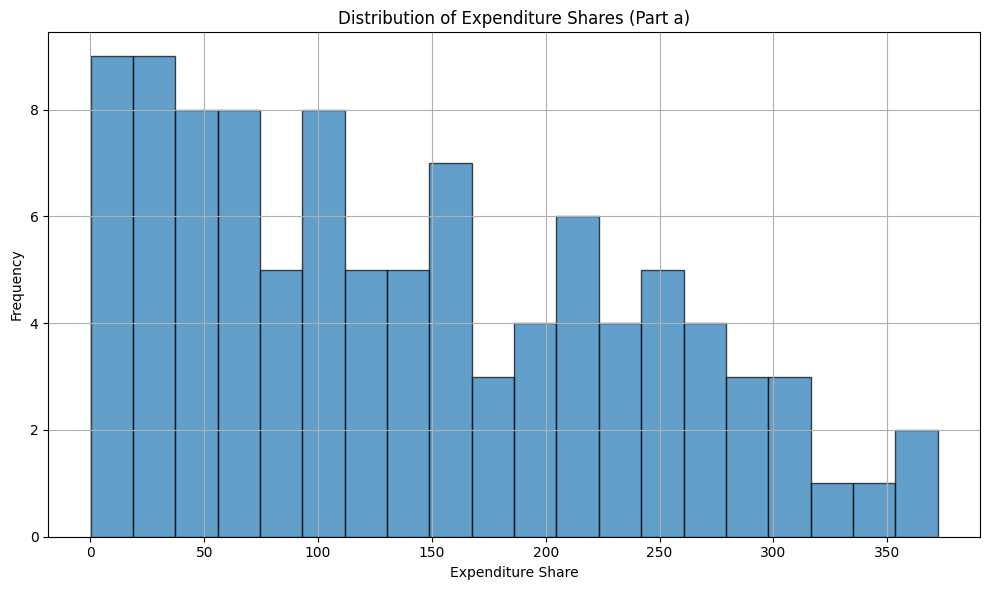

In [29]:
# Problem 3a (consumption share from class)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set parameters
sigma = 4
U = 1
num_goods = 100
shape_param = 8  # Pareto shape parameter α

# Step 1: Taste shifters from U(0,1), normalize for stability
np.random.seed(1)
taste_shifters = np.random.uniform(0, 1, num_goods)

# Step 2: Draw prices from Pareto(α=8, x_m=1)
def pareto_sample(size, xm=1.0, alpha=8):
    u = np.random.uniform(0, 1, size)
    return xm / (1 - u) ** (1 / alpha)

prices_a = pareto_sample(num_goods, xm=1, alpha=shape_param)

# Step 3: Compute CES price index
numerator =  np.sum(taste_shifters * (prices_a ** (1 - sigma)))
price_index = numerator ** (1 / (1 - sigma))


# Step 4: Compute expenditure shares
expenditure_shares = (taste_shifters * prices_a ** (1 - sigma)) / (price_index ** (1 + sigma))

# Step 5: Display table
df = pd.DataFrame({
    "Price": prices_a,
    "Taste Shifter (a_i)": taste_shifters,
    "Expenditure Share": expenditure_shares
})
df["CES Price Index (P)"] = price_index

print("Consumer CES Price Index (P):", price_index)
print("Sum of expenditure shares:", np.sum(expenditure_shares))
display(df.head())

# Step 6: Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(expenditure_shares, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribution of Expenditure Shares (Part a)")
plt.xlabel("Expenditure Share")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


# Part b.

Suppose that the prices are instead drawn from distribution $G(p) = 1 - (1.5/p)^8$. What happens to the expenditure shares and the price index? Overlay the distribution with the one from part a.

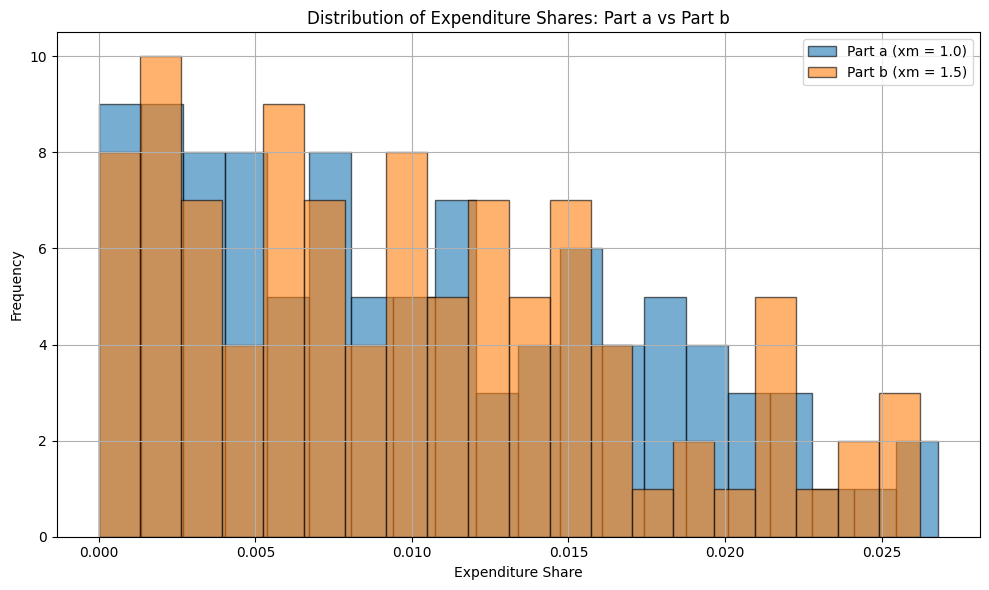

CES Price Index (Part a): 0.3035155870492272
CES Price Index (Part b): 0.4632624201262369
Sum of expenditure shares (b): 0.9999999999999999


,Price (a),Expenditure Share (a),Price (b),Expenditure Share (b),CES Price Index (a),CES Price Index (b)
0,1.050678,0.010053,2.182285,0.003989,0.303516,0.463262
1,1.098118,0.015210,1.660536,0.015641,0.303516,0.463262
2,1.311775,0.000001,2.043161,0.000001,0.303516,0.463262
3,1.056809,0.007162,1.705258,0.006062,0.303516,0.463262
4,1.348476,0.001673,1.595606,0.003592,0.303516,0.463262


In [39]:
# Problem 3b: Compare expenditure shares with xm = 1.0 vs xm = 1.5

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set parameters
sigma = 4
U = 1
num_goods = 100
shape_param = 8  # Pareto shape parameter α

# Set seed and draw taste shifters
np.random.seed(1)
taste_shifters = np.random.uniform(0, 1, num_goods)

# Define Pareto sampler
def pareto_sample(size, xm=1.0, alpha=8):
    u = np.random.uniform(0, 1, size)
    return xm / (1 - u) ** (1 / alpha)

# --- Part a ---
prices_a = pareto_sample(num_goods, xm=1.0, alpha=shape_param)

# Compute c_i for part a
numerator_a = taste_shifters * prices_a ** (-sigma)
denominator_sub_a = np.sum(taste_shifters * prices_a ** (1 - sigma))
denominator_a = denominator_sub_a ** (sigma / (1 - sigma))
c_a = numerator_a / denominator_a

# CES price index
price_index_a = denominator_sub_a ** (1 / (1 - sigma))

# Expenditure shares
expenditure_shares_a = (c_a * prices_a) / np.sum(c_a * prices_a)

# --- Part b ---
def pareto_sample_b(size, xm=1.0, alpha=8):
    u = np.random.uniform(0, 1, size)
    return xm / (1 - u) ** (1 / alpha)

prices_b = pareto_sample_b(num_goods, xm=1.5, alpha=shape_param)

# Compute c_i for part b
numerator_b = taste_shifters * prices_b ** (-sigma)
denominator_sub_b = np.sum(taste_shifters * prices_b ** (1 - sigma))
denominator_b = denominator_sub_b ** (sigma / (1 - sigma))
c_b = numerator_b / denominator_b

# CES price index for part b
price_index_b = denominator_sub_b ** (1 / (1 - sigma))

# Expenditure shares
expenditure_shares_b = (c_b * prices_b) / np.sum(c_b * prices_b)

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.hist(expenditure_shares_a, bins=20, alpha=0.6, edgecolor='black', label='Part a (xm = 1.0)')
plt.hist(expenditure_shares_b, bins=20, alpha=0.6, edgecolor='black', label='Part b (xm = 1.5)')
plt.title("Distribution of Expenditure Shares: Part a vs Part b")
plt.xlabel("Expenditure Share")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Display table ---
df_comparison = pd.DataFrame({
    "Price (a)": prices_a,
    "Expenditure Share (a)": expenditure_shares_a,
    "Price (b)": prices_b,
    "Expenditure Share (b)": expenditure_shares_b
})
df_comparison["CES Price Index (a)"] = price_index_a
df_comparison["CES Price Index (b)"] = price_index_b

# Print summary
print("CES Price Index (Part a):", price_index_a)
print("CES Price Index (Part b):", price_index_b)
print("Sum of expenditure shares (b):", np.sum(expenditure_shares_b))

# Preview table
df_comparison.head()


# Part c.

Now suppose that the taste shifters are no longer uniformly distributed, but instead are drawn from a Pareto distribution with shape parameter 8. Discuss what happens to expenditure shares and the price index.


We are interested in the change in the consumer's price index $P$ between the two price vectors in part (a) and part (b). The exact change is:

$$
\Delta \log P = \log P_b - \log P_a
$$

From the CES price index values computed in parts (a) and (b), we have:
$$
P_a = 0.3035, \quad P_b = 0.4633
$$

Substituting into the formula:

$$
\Delta \log P = \log(0.4633) - \log(0.3035) \approx -0.7700 - (-1.1929) = 0.4229
$$

We now apply a first-order approximation of the change in $\log P$ using the formula:

$$
d \log P \approx \sum_i s_i \cdot d \log p_i
$$

where $s_i$ are the expenditure shares computed at the initial prices (part a), and $d \log p_i = \log p_i^b - \log p_i^a$. Using the data, we compute:

$$
\sum_i s_i \cdot (\log p_i^b - \log p_i^a) \approx 0.4529
$$

# Comparison:
  - Exact log change in $P$: $0.4229$
  - First-order approximation: $0.4529$
  - Approximation error:  $0.0300$
  - Proportion of change captured:  $107.1\%$

# Conclusion:
 The first-order approximation slightly overestimates the true change in the CES price index. Note that after a price change consumption share changes (substitution effect) which is not captured in the approximation for the price index change.

In [40]:

# Compute logs of prices
log_prices_a = np.log(prices_a)
log_prices_b = np.log(prices_b)

# Compute change in log prices
delta_log_prices = log_prices_b - log_prices_a

# First-order approximation: weighted average of log price changes
log_change_approx = np.sum(expenditure_shares_a * delta_log_prices)

# Display result
print("First-order approximation of Δlog P:", log_change_approx)

First-order approximation of Δlog P: 0.4528695958567166


# Part d.

When prices are drawn from a Pareto distribution with a lower shape parameter (e.g., 5 instead of 8), the price distribution becomes more dispersed — more goods will have either very low or very high prices. 

Recall that the CES price index is given by:

$$P = \left( \sum_{i=1}^{n} a_i^{\frac{1}{\sigma}} p_i^{1 - \sigma} \right)^{\frac{1}{1 - \sigma}} $$

The first-order approximation we are using takes the form:

$$
d \log P \approx \sum_i s_i \cdot d \log p_i = \sum_i s_i \cdot (\log p_i^b - \log p_i^a) 
$$

As long as the second order effects are small, this approximation is accurate. However, second order effects are related to how $s_i$ changes after the price change. If the price change is higher, we might expect it produces higher changes in consumption shares.

Therefore, if the shape parameter falls from 8 to 5, increasing price dispersion, we would expect the first-order approximation to account for a smaller proportion of the total change in the price index. The larger the dispersion, the less accurate the linear approximation becomes, as it fails to capture the nonlinear substitution effects embedded in the CES function.

